In [4]:
import pandas as pd

In [5]:
path = 'Data/Part 2.csv'

In [6]:
df_part1 = pd.read_csv(path,skiprows=1)

In [7]:
df_part1 = df_part1.drop(columns=
                         ['Geographic identifier code', 
                          'Meaning of 2012 NAICS code',
                          'Meaning of Sales, receipts, or revenue size of establishments operated the entire year code' ])

In [8]:
df_part1["Geographic area name"]=df_part1["Geographic area name"].apply(lambda st: st[st.find(", ")+1:st.find(")")])

In [9]:
df_part1= df_part1.rename(columns={"Geographic area name": "State", "2012 NAICS code": "NAICS", 
                                   "Sales, receipts, or revenue size of establishments operated the entire year code": "RCP", 
                                   "Number of establishments": "Number"})

In [10]:
df_part1.head()

,Id2,State,NAICS,RCP,Year,Number
0,3901,ME,44-45,1,2012,7
1,3901,ME,44-45,2,2012,7
2,3901,ME,44-45,123,2012,1
3,3901,ME,44-45,125,2012,1
4,3901,ME,44-45,131,2012,1


In [11]:
df_part1_filtered = df_part1[df_part1['NAICS'].map(lambda x: len(x)) == 6] 

In [12]:
df_part1_filtered.head()

,Id2,State,NAICS,RCP,Year,Number
16,3901,ME,441120,1,2012,2
17,3901,ME,441120,2,2012,2
18,3901,ME,441120,132,2012,2
25,3901,ME,441310,1,2012,1
26,3901,ME,441310,2,2012,1


In [13]:
df_part1_pivot = df_part1_filtered.pivot_table(index='Id2',columns=['NAICS','RCP'],values='Number',fill_value=0)

In [14]:
df_part1_pivot.head()

NAICS 441110                             441120      ... 454310     454390  \
RCP      1   2   114 123 125 131 132 998    1   2    ...    132 998    1     
Id2                                                  ...                     
3901       0   0   0   0   0   0   0   0      2   2  ...      0   0      0   
3902       0   0   0   0   0   0   0   0      0   0  ...      0   0      0   
3903       0   0   0   0   0   0   0   0      1   1  ...      2   0      1   
3904       0   0   0   0   0   0   0   0      1   1  ...      1   0      2   
3905       0   0   0   0   0   0   0   0      0   0  ...      0   0      0   

NAICS                              
RCP   2   114 123 125 131 132 998  
Id2                                
3901    0   0   0   0   0   0   0  
3902    0   0   0   0   0   0   0  
3903    0   0   0   0   0   0   1  
3904    2   0   0   1   1   0   0  
3905    0   0   0   0   0   0   0  

[5 rows x 540 columns]

In [15]:
## look at irs data AGI stub and number of people in each category

In [16]:
path_irs='Data/12zpallagi.csv'

In [17]:
df_irs=pd.read_csv(path_irs)

In [18]:
df_irs=df_irs[['zipcode','AGI_STUB','N1']]

In [19]:
df_irs=df_irs.rename(columns={'zipcode':'Id2'})

In [20]:
df_irs_pivot=df_irs.pivot_table(index='Id2',columns='AGI_STUB',values='N1',fill_value=0)

In [21]:
df_irs_pivot.head()

AGI_STUB,1,2,3,4,5,6
Id2,,,,,,
0,1.106367e+06,663239.607843,373501.764706,237320.588235,305252.54902,100562.941176
1001,2.920000e+03,2280.000000,1500.000000,950.000000,1030.00000,100.000000
1002,3.560000e+03,1780.000000,1130.000000,810.000000,1570.00000,610.000000
1005,7.400000e+02,500.000000,400.000000,270.000000,290.00000,30.000000
1007,2.310000e+03,1530.000000,1060.000000,840.000000,1360.00000,220.000000


In [22]:
df_merge=df_part1_pivot.merge(df_irs_pivot, left_on='Id2', right_on='Id2', how='left')
df_merge.fillna(0,inplace=True)

C:\Users\Charlie\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [23]:
df_merge.head()

,"(441110, 1)","(441110, 2)","(441110, 114)","(441110, 123)","(441110, 125)","(441110, 131)","(441110, 132)","(441110, 998)","(441120, 1)","(441120, 2)",...,"(454390, 125)","(454390, 131)","(454390, 132)","(454390, 998)",1,2,3,4,5,6
Id2,,,,,,,,,,,,,,,,,,,,,
3901,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,1290.0,880.0,600.0,430.0,370.0,40.0
3902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,360.0,250.0,180.0,120.0,190.0,60.0
3903,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1090.0,640.0,510.0,370.0,550.0,130.0
3904,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1370.0,1150.0,660.0,380.0,450.0,90.0
3905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,310.0,200.0,160.0,110.0,190.0,60.0


In [24]:
# df_select_columns = pd.DataFrame()

# for i in df_part1_filtered['NAICS'].unique():
#     #print(type(i))
#     #df_select_columns=df_merge[[(i,1),(i,2),(i,114),(i,123), (i,125),(i,131),(i,132),(i,  998),1,2,3,4,5,6]]

In [25]:
wRev = {}
wRev[1] = 0
wRev[2] = 0
wRev[114] = (0 + 100)/2
wRev[123] = (250+100)/2
wRev[125] = (250+500)/2
wRev[131] = (500+1000)/2
wRev[132] = (1000+2000)/2
wRev[998] = 0

In [26]:
wInc = {}
wInc[1] = (0+25)/2
wInc[2] = (25+50)/2
wInc[3] = (50+75)/2
wInc[4] = (75+100)/2
wInc[5] = (100+200)/2
wInc[6] = (200+400)/2

In [27]:
def zeroToNull(x):
    if x == 0:
        return None
    else:
        return x

In [28]:
df_fraction=pd.DataFrame()
#df_fraction['Retail all']=df_select_columns[('441110',1)]
#df_fraction['Retail open']=df_select_columns[('441110',2)]/df_select_columns[('441110',1)]



df_fraction['AGI'] = wInc[1]*df_merge[1]+wInc[2]*df_merge[2]+wInc[3]*df_merge[3]+wInc[4]*df_merge[4]+wInc[5]*df_merge[5]+wInc[6]*df_merge[6]

for i in df_part1_filtered['NAICS'].unique():
    if (i,114) in df_merge:
        df_fraction['r'+i] = wRev[114]*df_merge[(i,114)] + wRev[123]*df_merge[(i,123)] + wRev[125]*df_merge[(i,125)] + wRev[131]*df_merge[(i,131)] + wRev[132]*df_merge[(i,132)]
        #df_fraction['r'+i] = df_fraction['r'+i].map(zeroToNull)



In [29]:
#df_fraction

In [30]:
df_fraction.head(5)

,AGI,r441120,r441310,r445120,r447110,r447190,r453910,r442299,r445110,r448120,...,r451140,r451211,r453991,r445299,r453930,r454112,r441228,r445310,r454210,r451212
Id2,,,,,,,,,,,,,,,,,,,,,
3901,191750.0,3000.0,750.0,375.0,1500.0,1500.0,175.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3902,82125.0,0.0,0.0,0.0,0.0,0.0,0.0,1125.0,1500.0,375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3903,223375.0,175.0,0.0,0.0,3000.0,750.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3904,229250.0,1500.0,0.0,375.0,7500.0,0.0,0.0,7175.0,1550.0,13875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3905,77500.0,0.0,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
Var_Corr=df_fraction.corr()
#Var_Corr

In [32]:
Var_Corr = Var_Corr.sort_values(by=['r441120'],ascending=False)
Var_Corr

,AGI,r441120,r441310,r445120,r447110,r447190,r453910,r442299,r445110,r448120,...,r451140,r451211,r453991,r445299,r453930,r454112,r441228,r445310,r454210,r451212
r441120,0.408219,1.000000,0.655299,0.217565,0.595447,0.349169,0.299465,0.246512,0.504883,0.227314,...,0.290948,0.279935,0.370445,0.142035,0.224850,0.040722,0.420849,0.459816,0.296719,0.056491
r441310,0.559971,0.655299,1.000000,0.283700,0.796917,0.435597,0.411434,0.343126,0.678725,0.323695,...,0.344614,0.367713,0.460101,0.194322,0.284314,0.052245,0.475634,0.573722,0.315592,0.087219
r447110,0.634053,0.595447,0.796917,0.294409,1.000000,0.430490,0.422938,0.381046,0.689271,0.361503,...,0.345154,0.398420,0.469607,0.217318,0.314944,0.066320,0.474063,0.575448,0.332689,0.063191
r452990,0.458893,0.542869,0.750195,0.261649,0.792500,0.411319,0.308538,0.276118,0.643647,0.299281,...,0.256638,0.338041,0.441825,0.145363,0.341216,0.036513,0.406933,0.518893,0.255584,0.080679
r441320,0.593957,0.536427,0.698946,0.244807,0.690573,0.348846,0.540733,0.493344,0.597180,0.473131,...,0.453381,0.466246,0.380217,0.254203,0.211481,0.111738,0.440565,0.520915,0.288316,0.099840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r445292,0.304035,0.061450,0.104672,0.174589,0.120093,0.069029,0.259712,0.384497,0.234539,0.525930,...,0.161871,0.265288,0.087025,0.321158,0.009426,0.057402,0.056671,0.165956,0.085299,0.237859
r451212,0.123205,0.056491,0.087219,0.120017,0.063191,0.039176,0.100870,0.102830,0.139978,0.093649,...,0.082231,0.111016,0.036527,0.138614,0.009293,0.084677,0.058789,0.101460,0.027918,1.000000
r454112,0.133550,0.040722,0.052245,0.056744,0.066320,0.034190,0.155250,0.131234,0.105626,0.109151,...,0.119714,0.088742,0.018296,0.103828,0.024036,1.000000,0.016143,0.140450,0.053739,0.084677
r448320,0.158481,0.029126,0.032762,0.355556,0.056877,0.062106,0.090330,0.341856,0.137513,0.533559,...,0.133552,0.161934,0.036980,0.258308,-0.003755,0.047633,0.036580,0.086204,0.069970,0.073664


In [33]:
def getScore(item):
    return item[2]

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [35]:

depths = [5,10,20]

xPlot = {}
yPlot = {}

for depth in depths:
    
    print(depth)

    ranking = pd.DataFrame()
    ranking['AGI'] = df_fraction['AGI']

    for rIndex in list(df_fraction.columns):
        if rIndex == 'AGI':
            continue
        rIndex = rIndex[1:len(rIndex)]
    
        clf = RandomForestClassifier(max_depth = depth, random_state=0)
    
    
    
        x = df_fraction.drop('r'+rIndex, axis=1).values
        y = df_fraction['r' + rIndex].values
    

#     valid = np.isfinite(y)

#     x  = x[valid].reshape(-1,1)
#     y = y[valid].reshape(-1,1)
    
#     linear_regressor = LinearRegression()
#     linear_regressor.fit(x,y)
#     y_pred = linear_regressor.predict(x)

        clf.fit(x,y)
        y_pred = clf.predict(x)
    
        z = y-y_pred

    
        ranking['s' + rIndex] = z
        
    nSmallest = 20
    orderedRank = []

    for rIndex in list(ranking.columns):
        if rIndex == 'AGI':
            continue
    
        small = ranking.nsmallest(nSmallest,rIndex)[rIndex]
        for i in range(nSmallest):
            zCode = small.index[i]
            score = small[small.index[i]]
            orderedRank.append((zCode,rIndex,score))

        
        
    orderedRank = sorted(orderedRank,key=getScore)

    top = 1
    for i in orderedRank:
        if top < 11:
            print(top,':',i[0],i[1],i[2])
            top += 1
        
    x = []
    y = []
    j = 1
    for i in orderedRank:
        x.append(j)
        y.append(-int(i[2]))
        j += 1
    
    xPlot[depth] = x
    yPlot[depth] = y

5
1 : 60641 s447110 -8825.0
2 : 46545 s447110 -6750.0
3 : 60540 s448210 -6750.0
4 : 60614 s448310 -6175.0
5 : 46060 s447110 -6000.0
6 : 60160 s447110 -6000.0
7 : 67218 s447110 -6000.0
8 : 31601 s446110 -6000.0
9 : 96797 s452990 -6000.0
10 : 66614 s443142 -5075.0
10
1 : 30135 s448120 -5175.0
2 : 30290 s447110 -4500.0
3 : 46034 s447110 -4500.0
4 : 67880 s447110 -4500.0
5 : 31313 s446110 -4450.0
6 : 51106 s446110 -4450.0
7 : 30606 s441310 -4150.0
8 : 67501 s446110 -4125.0
9 : 60181 s441320 -4125.0
10 : 60429 s447110 -3750.0
20
1 : 3905 s447110 -1500.0
2 : 4041 s447110 -1500.0
3 : 4049 s447110 -1500.0
4 : 4051 s447110 -1500.0
5 : 4110 s447110 -1500.0
6 : 4488 s447110 -1500.0
7 : 4544 s447110 -1500.0
8 : 4574 s447110 -1500.0
9 : 4786 s447110 -1500.0
10 : 4854 s447110 -1500.0


In [36]:

rankingLinear = pd.DataFrame()
rankingLinear['AGI'] = df_fraction['AGI']

for rIndex in list(df_fraction.columns):
    
    if rIndex == 'AGI':
        continue
    rIndex = rIndex[1:len(rIndex)]
    
    
    x = df_fraction.loc[:, 'AGI'].values.reshape(-1, 1)
    y = df_fraction.loc[:, 'r' + rIndex].values.reshape(-1, 1)

    valid = np.isfinite(y)

    x  = x[valid].reshape(-1,1)
    y = y[valid].reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(x,y)
    y_pred = linear_regressor.predict(x)
    linear_regressor.coef_
    linear_regressor.intercept_
    
    slope = linear_regressor.coef_
    intercept = linear_regressor.intercept_

    z = df_fraction.loc[:,'r'+ rIndex].values.reshape(-1,1) - (intercept + slope*df_fraction.loc[:,'AGI'].values.reshape(-1,1))


    
    rankingLinear['s' + rIndex] = z

In [37]:

orderedRankLinear = []

for rIndex in list(ranking.columns):
    if rIndex == 'AGI':
        continue
    
    small = rankingLinear.nsmallest(nSmallest,rIndex)[rIndex]
    for i in range(nSmallest):
        zCode = small.index[i]
        score = small[small.index[i]]
        orderedRankLinear.append((zCode,rIndex,score))

        
        
orderedRankLinear = sorted(orderedRankLinear,key=getScore)

for i in orderedRankLinear:
    print(i[0],i[1],i[2])

60657 s447110 -35765.63810485284
60614 s447110 -31996.909015740217
60611 s447110 -24249.676041689152
66062 s447110 -21038.000643701143
30319 s447110 -19036.801520782712
60565 s447110 -18758.259446052776
60640 s447110 -18321.315545692687
60610 s447110 -18281.089403985374
60010 s447110 -18278.03325759649
30075 s447110 -18128.02130851799
60047 s447110 -17648.08330296853
30022 s447110 -17586.19914800093
60004 s447110 -17308.46164285412
60189 s447110 -16748.01160849754
60564 s447110 -16746.025253974734
60089 s447110 -16354.376003201774
60201 s447110 -16286.421025337022
46033 s447110 -16245.974177571617
60613 s447110 -16078.617121121519
60540 s447110 -15783.09309648693
60010 s445110 -13987.011219171847
60657 s445110 -13189.701210915453
60657 s441310 -12883.68651608345
60614 s441310 -11795.363236747406
60657 s452990 -10915.152859267995
60614 s452990 -10464.847607964195
60657 s441110 -10439.568351013068
30024 s441310 -9806.049314959162
60657 s444190 -9777.955679143372
60004 s446110 -9707.98299

In [38]:
xLinear = []
yLinear = []
j = 1
for i in orderedRankLinear:
    xLinear.append(j)
    yLinear.append(-int(i[2]))
    j += 1

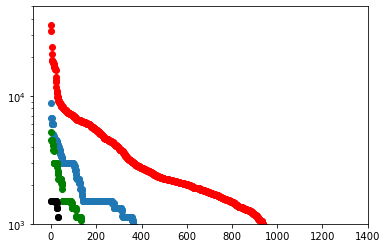

In [39]:
fig = plt.figure(1)
plt.scatter(xPlot[5],yPlot[5])
plt.scatter(xPlot[10],yPlot[10],color ='green')
plt.scatter(xPlot[20],yPlot[20],color='black')
plt.scatter(xLinear,yLinear, color='red')

plt.gca().set_yscale('log')
#plt.gca().set_xlim(0,50)
plt.gca().set_ylim(1000,50000)
plt.show()